In [1]:
## Initialising
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
## Import dataset
earthquakes = pd.read_csv('all_month.csv')

This data set is taken from USGS (U.S Geological Survey) and shared by Faraz Rahman on Kaggle.
It contains details of all earthquakes that occurred between 25-08-2023 and 24-09-2023.

In [3]:
## Checking the data
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9662 entries, 0 to 9661
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9662 non-null   object 
 1   latitude         9662 non-null   float64
 2   longitude        9662 non-null   float64
 3   depth            9662 non-null   float64
 4   mag              9661 non-null   float64
 5   magType          9661 non-null   object 
 6   nst              7316 non-null   float64
 7   gap              7316 non-null   float64
 8   dmin             5868 non-null   float64
 9   rms              9662 non-null   float64
 10  net              9662 non-null   object 
 11  id               9662 non-null   object 
 12  updated          9662 non-null   object 
 13  place            9662 non-null   object 
 14  type             9662 non-null   object 
 15  horizontalError  6691 non-null   float64
 16  depthError       9661 non-null   float64
 17  magError      

In [4]:
## Viewing a sample of the data
earthquakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-09-24T02:32:24.208Z,60.240700,-151.038500,54.60,1.10,ml,NaN,NaN,NaN,0.52,...,2023-09-24T02:34:28.879Z,"Kenai Peninsula, Alaska",earthquake,NaN,1.60,NaN,NaN,automatic,ak,ak
1,2023-09-24T02:32:04.780Z,38.822334,-122.850998,-0.63,0.65,md,10.0,123.0,0.02171,0.21,...,2023-09-24T02:33:39.590Z,"10 km WNW of The Geysers, CA",earthquake,0.51,2.40,0.340,8.0,automatic,nc,nc
2,2023-09-24T02:25:52.951Z,59.845400,-152.259600,85.80,1.50,ml,NaN,NaN,NaN,0.29,...,2023-09-24T02:28:10.637Z,"25 km WNW of Anchor Point, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
3,2023-09-24T02:22:34.663Z,58.249700,-155.080200,1.20,1.10,ml,NaN,NaN,NaN,0.32,...,2023-09-24T02:24:37.701Z,"84 km NNW of Karluk, Alaska",earthquake,NaN,1.50,NaN,NaN,automatic,ak,ak
4,2023-09-24T02:07:25.788Z,31.020400,141.875300,10.00,4.50,mb,31.0,136.0,5.92800,0.65,...,2023-09-24T02:26:52.040Z,"Izu Islands, Japan region",earthquake,12.91,1.92,0.127,18.0,reviewed,us,us


In [5]:
## A summary of the data averages and distribution
earthquakes.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9662.000000,9662.000000,9662.000000,9661.000000,7316.000000,7316.000000,5868.000000,9662.000000,6691.000000,9661.000000,7283.000000,7306.000000
mean,40.912697,-116.671667,23.355603,1.565404,22.765856,117.215181,0.595249,0.288808,1.673778,2.099876,0.225285,16.652614
std,18.974728,65.423597,52.890429,1.202643,22.257144,66.359577,2.084116,0.266167,3.799421,4.939657,0.343733,27.449907
min,-65.899300,-179.994000,-3.430000,-1.020000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.991375,-152.311550,2.850000,0.770000,10.000000,68.000000,0.020028,0.100000,0.260000,0.400000,0.111000,6.000000
50%,38.836499,-122.788833,8.180000,1.340000,16.000000,99.000000,0.061570,0.180000,0.440000,0.700000,0.165206,10.000000
75%,57.997700,-116.590667,17.007500,2.000000,28.000000,151.475000,0.173125,0.460000,1.028817,1.530000,0.237541,18.000000
max,79.568100,179.977500,649.778000,7.100000,393.000000,357.000000,35.654000,2.820000,176.932676,87.300000,5.240000,504.000000


Text(0, 0.5, 'Number of earthquakes')

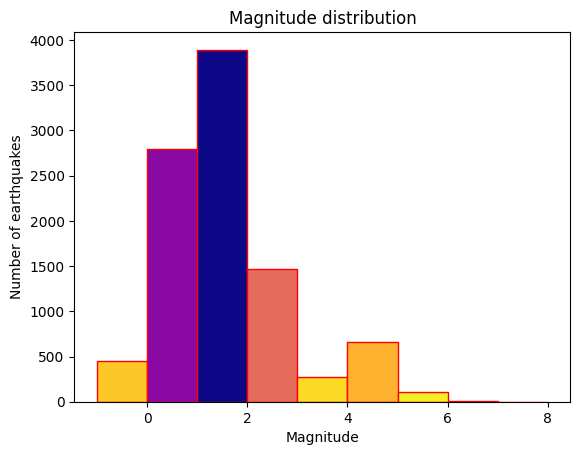

In [6]:
## Visualising magnitude distribution with a histogram
fig, ax = plt.subplots()

cnts, values, bars = ax.hist(earthquakes['mag'], edgecolor='red', bins=[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8])

cmap = plt.cm.plasma_r

for i, (cnt, value, bar) in enumerate(zip(cnts, values, bars)):
    bar.set_facecolor(cmap(cnt/cnts.max()))

plt.title('Magnitude distribution')
plt.xlabel('Magnitude')
plt.ylabel('Number of earthquakes')


The majority of earthquakes recorded had a magnitude of 2 or below with most between 1 and 2.
The frequency of earthquakes over a magnitude of 2 generally decreased, aside from earthquakes with a magnitude of between 4 and 5.

Text(0, 0.5, 'Number of earthquakes')

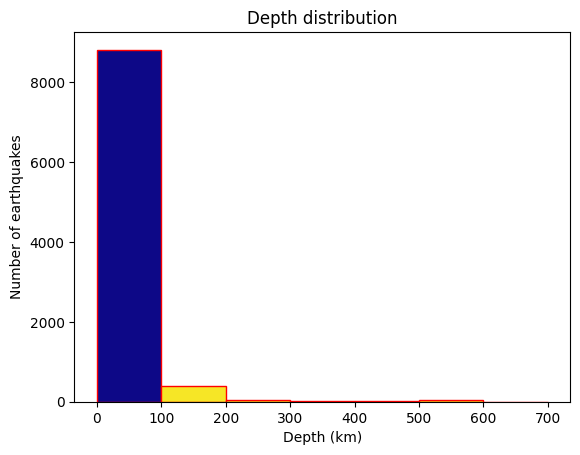

In [7]:
## Visualising depth distribution with a histogram
fig, ax = plt.subplots()

cnts, values, bars = ax.hist(earthquakes['depth'], edgecolor='red', bins=[0, 100, 200, 300, 400, 500, 600, 700])

cmap = plt.cm.plasma_r

for i, (cnt, value, bar) in enumerate(zip(cnts, values, bars)):
    bar.set_facecolor(cmap(cnt/cnts.max()))

plt.title('Depth distribution')
plt.xlabel('Depth (km)')
plt.ylabel('Number of earthquakes')

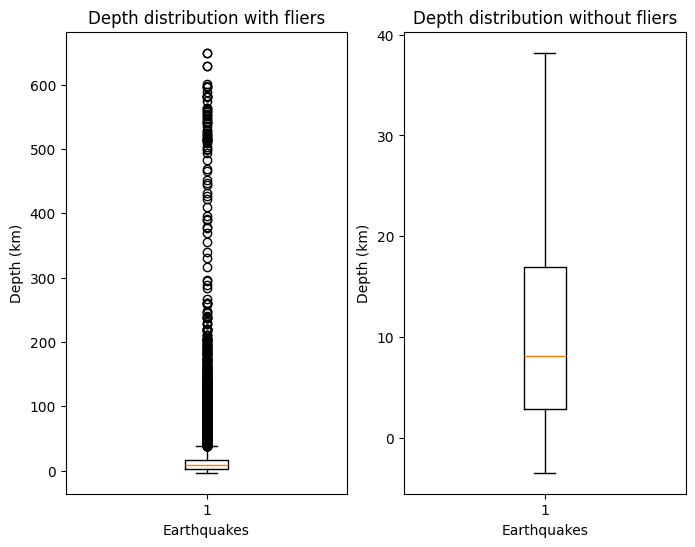

In [8]:
## Taking a closer look at depth distribution with box plots

fig, ax = plt.subplots(1,2)
fig.set_size_inches(8, 6)
ax[0].boxplot(earthquakes['depth'])
ax[0].set_title('Depth distribution with fliers')
ax[1].boxplot(earthquakes['depth'], showfliers=False)
ax[1].set_title('Depth distribution without fliers')

for i in range(len(ax)):
    ax[i].set_xlabel('Earthquakes')
    ax[i].set_ylabel('Depth (km)')

Most of the earthquakes recorded had a depth from 0km to roughly 100km. 
The box plots show that the depths are skewed more positively with the median roughly 8km with the interquartile range between roughly 3km and 17km. The box plot with fliers shows plenty of depths recorded outside of the range.

Text(0, 0.5, 'Depth (km)')

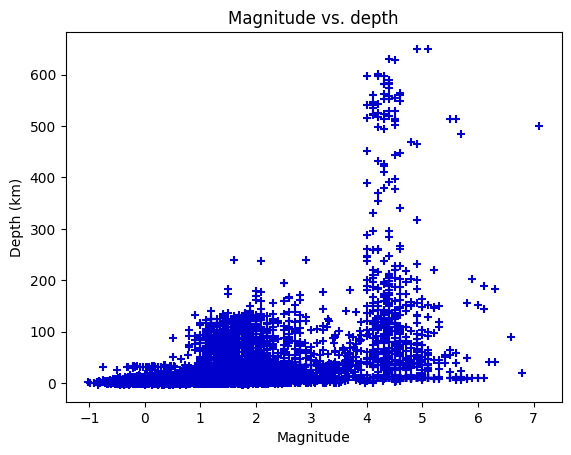

In [9]:
## Visualising magnitude against depth with a scatter plot

fig, ax = plt.subplots()
plt.scatter(x='mag', y='depth', data=earthquakes, color='mediumblue', marker='+')

plt.title('Magnitude vs. depth')
plt.xlabel('Magnitude')
plt.ylabel('Depth (km)')

The majority of the earthquakes happened between depths of 0km to 200km. Earthquakes of the lowest magnitudes happened under 100km.

The earthquakes with a magnitude between 4 and 5 had a much wider distribution of depths with many occurring at larger depths, some even reaching over 600km. However, this dataset has significantly more records of earthquakes occurring between magnitude 4 and 5. There may also be a wide distribution of depths for earthquakes over magnitude 5 but more data would need to be collected to find out.

In [10]:
## Invesitgating the frequency of earthquakes over the time period

## Converting the time column to datetime format
earthquakes['time'] = pd.to_datetime(earthquakes['time'])

## Add a date column to dataframe
earthquakes['date'] = earthquakes['time'].dt.date.astype('datetime64[ns]')

## Creating a dataframe for earthquake count per date
quake_dates = pd.DataFrame(earthquakes['date'].value_counts())
quake_dates.reset_index(inplace=True)
quake_dates.sort_values(by='date', inplace=True)

quake_dates

,date,count
0,2023-08-25,424
10,2023-08-26,364
3,2023-08-27,393
6,2023-08-28,380
14,2023-08-29,346
8,2023-08-30,376
7,2023-08-31,377
17,2023-09-01,303
16,2023-09-02,317
9,2023-09-03,366


Text(0, 0.5, 'Number of earthquakes')

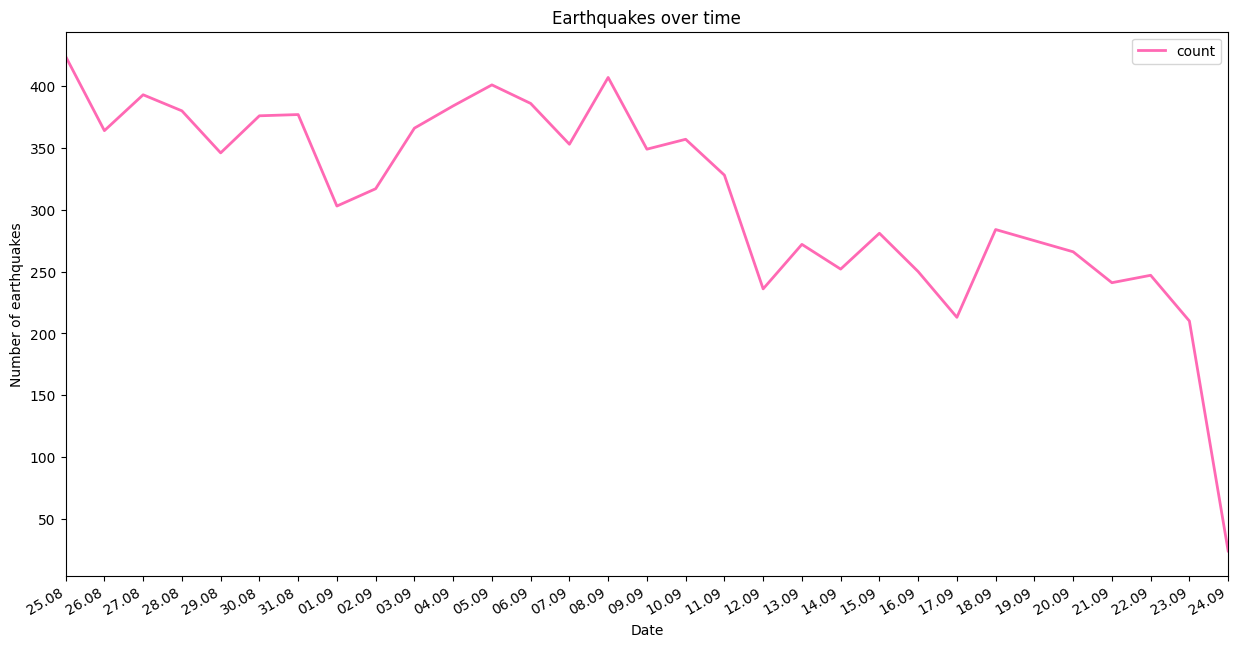

In [11]:
## Visualising earthquakes over time with a line chart

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

quake_dates.plot(x = 'date', y = 'count', linewidth=2.0, c='hotpink', ax=ax)
ax.xaxis.set_major_locator(matplotlib.dates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d.%m'))
fig.autofmt_xdate()

plt.title('Earthquakes over time')
plt.xlabel('Date')
plt.ylabel('Number of earthquakes')
## https://stackoverflow.com/questions/65232750/matplotlib-show-all-dates-on-custom-formatted-x-axis


Earthquake activity wasn't consistent throughout the time period.

The severe drop of earthquakes on the 24th September may be an outlier or it may be that all of the data had not yet been recorded for that day. This requires further investigation into the data source.

In [12]:
## Investigating the frequency of earthquakes per day of the week

## Adding a day of week column
earthquakes['day'] = earthquakes['time'].dt.day_name()

## Filtering the data by date range so there are an equal number of days
filtered_earthquakes = earthquakes.loc[(earthquakes['date'] <= '2023-09-21')]

## Replicating the code from before to create a dataframe for earthquake count per day and ordering the days of the week
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
filtered_quake_days = pd.DataFrame(filtered_earthquakes['day'].value_counts())
filtered_quake_days.reset_index(inplace=True)
filtered_quake_days['day'] = pd.Categorical(filtered_quake_days['day'], categories=cats, ordered=True)
filtered_quake_days = filtered_quake_days.sort_values('day')
filtered_quake_days

,day,count
1,Monday,1376
5,Tuesday,1258
3,Wednesday,1300
6,Thursday,1223
0,Friday,1415
4,Saturday,1280
2,Sunday,1329


The original dataset included 5 Fridays, Saturdays, and Sundays but only 4 of the other days. To analyse an equal number of dats, the dataframe was filtered to only include the date range between 25-08-2023 to 21-09-2023.

Text(0, 0.5, 'Number of earthquakes')

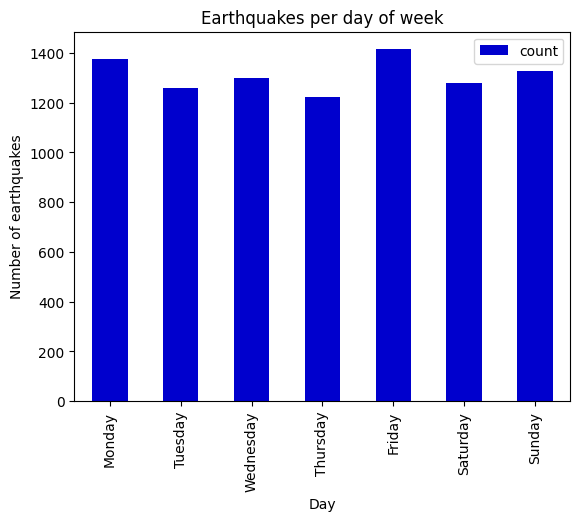

In [13]:
## Creating a new bar chart

fig, ax = plt.subplots()
filtered_quake_days.plot(kind='bar', x = 'day', y = 'count', color='mediumblue', ax=ax)

plt.title('Earthquakes per day of week')
plt.xlabel('Day')
plt.ylabel('Number of earthquakes')

Text(0.5, 1.0, 'Earthquake distribution by days')

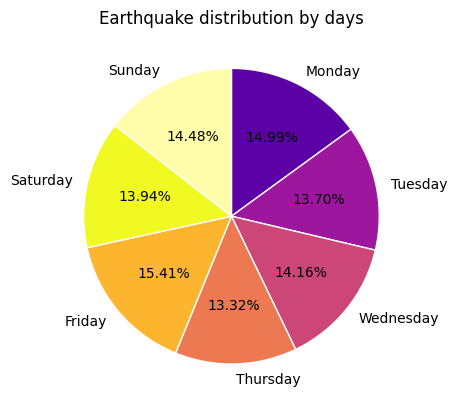

In [14]:
## Creating a pie chart

fig, ax = plt.subplots()
colors = ['#5c01a6', '#9c179e', '#cc4778', '#ed7953', '#fdb42f', '#f0f921', '#FFFCAA']
cmap = plt.cm.Accent

ax.pie(filtered_quake_days['count'], labels=filtered_quake_days['day'], colors=colors, counterclock = False, startangle=90, autopct='%1.2f%%',
       wedgeprops={"linewidth": 1, "edgecolor": "white"})
plt.title('Earthquake distribution by days')

Most of the earthquakes occurred on Fridays while the least occurred on Thursdays.